In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
def read_score(f):
    return float(f.read().split(' \n')[-1].split(',')[0].split(':')[-1]) * 100

def rename_model(f):
    return '-'.join(f.split('-')[5:-1])

# Section one
## Demonstrate efficacy of timbre and pitch space through showing classification accuracy with varying amounts of supervision

# GMVAE

In [3]:
path_to_model = '/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2'
#path_to_model = '/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved_upgradeCLF//Sol_GMVAE_v2'

In [4]:
def generate_score_df(ider, code, target, model):
    txt_result = 'classify-code_%s-target_%s.txt' % (code, target)
    result_dir = sorted([os.path.join(path_to_model, i, txt_result) for i in os.listdir(path_to_model) if ider in i])
    names = []
    scores = []
    for f in result_dir:
        txt_file = open(f, "r")
        best_score = read_score(txt_file)
        model_name = rename_model(f.split('/')[-2])
        names.append(model_name)
        scores.append(best_score)
    df1 = pd.DataFrame({'type': model, 'model':names, 'code':code, 'target':target, 'score':scores})
    return df1

## pc = 1

In [5]:
# pc = 1
ider = 'latent_16-pow_0-lvl_0-pc_1-pd_1'

In [6]:
code = 'pitch'
target = 'pitch'
df1 = generate_score_df(ider, code, target, 'gmvae')
df1.head()

,type,model,code,target,score
0,gmvae,ss_0.0-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,pitch,97.2656
1,gmvae,ss_0.25-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,pitch,98.4375
2,gmvae,ss_0.5-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,pitch,98.4375
3,gmvae,ss_0.75-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,pitch,98.4375
4,gmvae,ss_1.0-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,pitch,97.6562


In [7]:
code = 'pitch'
target = 'instrument'
df2 = generate_score_df(ider, code, target, 'gmvae')
df2.head()

,type,model,code,target,score
0,gmvae,ss_0.0-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,instrument,19.6668
1,gmvae,ss_0.25-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,instrument,18.7978
2,gmvae,ss_0.5-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,instrument,19.8182
3,gmvae,ss_0.75-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,instrument,18.2557
4,gmvae,ss_1.0-latent_16-pow_0-lvl_0-pc_1-pd_1,pitch,instrument,20.5995


In [8]:
code = 'timbre'
target = 'instrument'
df3 = generate_score_df(ider, code, target, 'gmvae')
df3.head()

,type,model,code,target,score
0,gmvae,ss_0.0-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,instrument,95.0733
1,gmvae,ss_0.25-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,instrument,98.0469
2,gmvae,ss_0.5-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,instrument,99.2188
3,gmvae,ss_0.75-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,instrument,100.0000
4,gmvae,ss_1.0-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,instrument,100.0000


In [9]:
code = 'timbre'
target = 'pitch'
df4 = generate_score_df(ider, code, target, 'gmvae')
df4.head()

,type,model,code,target,score
0,gmvae,ss_0.0-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,pitch,17.7136
1,gmvae,ss_0.25-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,pitch,7.7487
2,gmvae,ss_0.5-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,pitch,9.2474
3,gmvae,ss_0.75-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,pitch,5.6441
4,gmvae,ss_1.0-latent_16-pow_0-lvl_0-pc_1-pd_1,timbre,pitch,3.2127


## pc = 0

In [10]:
# pc = 0
ider = 'latent_16-pow_0-lvl_0-pc_0-pd_0'
code = 'timbre'

In [11]:
target = 'instrument'
df5 = generate_score_df(ider, code, target, 'gmvae')
df5.head()

,type,model,code,target,score
0,gmvae,ss_0.0-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,instrument,92.0998
1,gmvae,ss_0.25-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,instrument,93.9015
2,gmvae,ss_0.5-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,instrument,92.0998
3,gmvae,ss_0.75-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,instrument,91.6215
4,gmvae,ss_1.0-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,instrument,91.4700


In [12]:
target = 'pitch'
df6 = generate_score_df(ider, code, target, 'gmvae')
df6.head()

,type,model,code,target,score
0,gmvae,ss_0.0-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,pitch,94.6827
1,gmvae,ss_0.25-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,pitch,93.5108
2,gmvae,ss_0.5-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,pitch,91.7092
3,gmvae,ss_0.75-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,pitch,94.9219
4,gmvae,ss_1.0-latent_16-pow_0-lvl_0-pc_0-pd_0,timbre,pitch,91.9483


# VAE

In [13]:
#path_to_model = '/data/yinjyun/projects/gmvae-timbre/vae-timbre/saved/Sol_VAE/'
path_to_model = '/data/yinjyun/projects/gmvae-timbre/vae-timbre/saved_upgradeCLF/Sol_VAE/'
#path_to_model = '/data/yinjyun/projects/gmvae-timbre/vae-timbre/saved_upgradeCLF_plin//Sol_VAE/'

## pc = 1

In [14]:
ider = 'pc_1'

In [15]:
code = 'pitch'
target = 'pitch'
df_vae1 = generate_score_df(ider, code, target, 'vae')
df_vae1.head()

,type,model,code,target,score
0,vae,ss_0.0-latent_16-pc_1,pitch,pitch,97.6562
1,vae,ss_0.25-latent_16-pc_1,pitch,pitch,97.6562
2,vae,ss_0.5-latent_16-pc_1,pitch,pitch,98.4375
3,vae,ss_0.75-latent_16-pc_1,pitch,pitch,98.0469
4,vae,ss_1.0-latent_16-pc_1,pitch,pitch,98.8281


In [16]:
code = 'pitch'
target = 'instrument'
df_vae2 = generate_score_df(ider, code, target, 'vae')
df_vae2.head()

,type,model,code,target,score
0,vae,ss_0.0-latent_16-pc_1,pitch,instrument,16.9962
1,vae,ss_0.25-latent_16-pc_1,pitch,instrument,22.7280
2,vae,ss_0.5-latent_16-pc_1,pitch,instrument,16.7570
3,vae,ss_0.75-latent_16-pc_1,pitch,instrument,18.0166
4,vae,ss_1.0-latent_16-pc_1,pitch,instrument,16.6055


In [17]:
code = 'timbre'
target = 'instrument'
df_vae3 = generate_score_df(ider, code, target, 'vae')
df_vae3.head()

,type,model,code,target,score
0,vae,ss_0.0-latent_16-pc_1,timbre,instrument,97.2656
1,vae,ss_0.25-latent_16-pc_1,timbre,instrument,96.6358
2,vae,ss_0.5-latent_16-pc_1,timbre,instrument,97.4171
3,vae,ss_0.75-latent_16-pc_1,timbre,instrument,98.0469
4,vae,ss_1.0-latent_16-pc_1,timbre,instrument,94.4436


In [18]:
code = 'timbre'
target = 'pitch'
df_vae4 = generate_score_df(ider, code, target, 'vae')
df_vae4.head()

,type,model,code,target,score
0,vae,ss_0.0-latent_16-pc_1,timbre,pitch,12.2210
1,vae,ss_0.25-latent_16-pc_1,timbre,pitch,16.7570
2,vae,ss_0.5-latent_16-pc_1,timbre,pitch,15.9758
3,vae,ss_0.75-latent_16-pc_1,timbre,pitch,7.9879
4,vae,ss_1.0-latent_16-pc_1,timbre,pitch,3.9939


## pc = 0

In [19]:
ider = 'pc_0'

In [20]:
code = 'timbre'
target = 'pitch'
df_vae5 = generate_score_df(ider, code, target, 'vae')
df_vae5.head()

,type,model,code,target,score
0,vae,ss_0.0-latent_16-pc_0,timbre,pitch,96.0938
1,vae,ss_0.25-latent_16-pc_0,timbre,pitch,95.8546
2,vae,ss_0.5-latent_16-pc_0,timbre,pitch,92.8811
3,vae,ss_0.75-latent_16-pc_0,timbre,pitch,91.4700
4,vae,ss_1.0-latent_16-pc_0,timbre,pitch,94.2921


In [21]:
code = 'timbre'
target = 'instrument'
df_vae6 = generate_score_df(ider, code, target, 'vae')
df_vae6.head()

,type,model,code,target,score
0,vae,ss_0.0-latent_16-pc_0,timbre,instrument,94.2921
1,vae,ss_0.25-latent_16-pc_0,timbre,instrument,96.8750
2,vae,ss_0.5-latent_16-pc_0,timbre,instrument,96.0938
3,vae,ss_0.75-latent_16-pc_0,timbre,instrument,98.0469
4,vae,ss_1.0-latent_16-pc_0,timbre,instrument,95.0733


# CNN

In [22]:
import torch

In [23]:
def read_cnn_score(pt):
    return (pt['logger'].entries[int(pt['epoch']) - pt['config']['trainer']['early_stop']]['val_classify_acc']) * 100

def rename_model(f):
    return '-'.join(f.split('/')[-2].split('-')[5:7])

In [24]:
path_to_cnn = '/data/yinjyun/projects/gmvae-timbre/CNN-timbre/saved/Sol_CNN'


In [25]:
def generate_cnn_score_df(target, model):
    result_dir = sorted([os.path.join(path_to_cnn, i, 'model_best.pth') for i in os.listdir(path_to_cnn) if target in i])
    names = []
    scores = []
    for i in result_dir:
        pt = torch.load(i)
        scores.append(read_cnn_score(pt))
        names.append(rename_model(i))

    df = pd.DataFrame({'type':model, 'model':names, 'target':target, 'score':scores})
    return df

In [26]:
df_cnn = generate_cnn_score_df('pitch', 'cnn')
df_cnn.head()

,type,model,target,score
0,cnn,ss_1.0-target_pitch,pitch,98.198342


In [27]:
df_cnn = generate_cnn_score_df('timbre', 'cnn')
df_cnn.head()

,type,model,target,score
0,cnn,ss_0.25-target_timbre,timbre,92.251276
1,cnn,ss_0.5-target_timbre,timbre,98.437500
2,cnn,ss_0.75-target_timbre,timbre,99.218750
3,cnn,ss_1.0-target_timbre,timbre,100.000000


# Section Two
# Qulitative evaluation using TSNE plots of latent space (Not shown here)

# Section Three
## Objective evaluation for the two applications

In [28]:
path_to_model = '/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/melspec_256-first_chunk-include_onset-fix_piano-normalize-ss_1.0-latent_16-pow_0-lvl_0-pc_1-pd_1-val_lower_bound/'


## Controllable synthesis 
## Also, show CNNs performance on the whole synthesized validation set to see the effect of using synthesized samples for testing

In [29]:
idfr = 'test_controll'

In [30]:
def gen_controllable_score(pm):
    l = sorted(i for i in os.listdir(pm) if idfr in i)
    ins_score = []
    pitch_score = []
    w = []
    ss = []
    for i in l:
        ss.append(str(int(float(i.split('-')[1].split('_')[1]) * 100)))
        w.append(float('.'.join(i.split('-')[2].split('_')[1].split('.')[0:-1])))
        f = open(os.path.join(pm, i), "r")
        l_score = f.read().split(', ')
        ins_score.append(float(l_score[0].split(':')[1]) * 100)
        pitch_score.append(float(l_score[1].split(':')[1]) * 100)

    return pd.DataFrame({'N (%)':ss , 'w': w, 'instrument (%)': ins_score, 'pitch (%)': pitch_score})

In [31]:
df_1 = gen_controllable_score(path_to_model)
df_75 = gen_controllable_score('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/melspec_256-first_chunk-include_onset-fix_piano-normalize-ss_0.75-latent_16-pow_0-lvl_0-pc_1-pd_1-val_lower_bound/')
df_50 = gen_controllable_score('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/melspec_256-first_chunk-include_onset-fix_piano-normalize-ss_0.5-latent_16-pow_0-lvl_0-pc_1-pd_1-val_lower_bound/')
df_25 = gen_controllable_score('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/melspec_256-first_chunk-include_onset-fix_piano-normalize-ss_0.25-latent_16-pow_0-lvl_0-pc_1-pd_1-val_lower_bound/')

In [32]:
df_stack = df_25.append(df_50, ignore_index=True).append(df_75, ignore_index=True).append(df_1, ignore_index=True)
df_stack

,N (%),w,instrument (%),pitch (%)
0,25,0.0,98.8281,99.6094
1,25,0.5,94.1643,97.9945
2,25,1.0,75.9617,95.0694
3,50,0.0,100.0000,99.2188
4,50,0.5,94.8905,97.4628
5,50,1.0,77.8723,94.4095
6,75,0.0,100.0000,98.8281
7,75,0.5,96.6603,97.8925
8,75,1.0,80.0959,95.5881
9,100,0.0,100.0000,100.0000


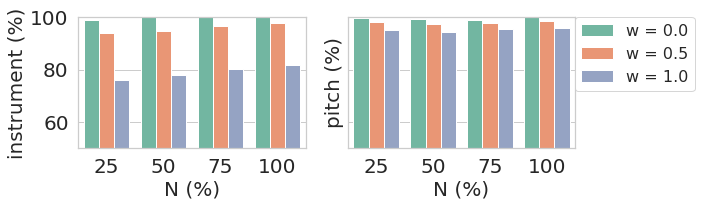

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns   
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 3))
#sns.barplot(x='N (%)', y='instrument (%)', hue='w', data=df_stack, ax=ax, order=['25', '50', '75', '100'], palette="Set2")
sns.barplot(x='N (%)', y='instrument (%)', hue='w', data=df_stack, ax=ax[0], order=['25', '50', '75', '100'], palette="Set2")
sns.barplot(x='N (%)', y='pitch (%)', hue='w', data=df_stack, ax=ax[1], order=['25', '50', '75', '100'], palette="Set2")
ax[0].get_legend().remove()
ax[1].legend(bbox_to_anchor=(1.26, 1), loc="upper center", borderaxespad=0., prop={'size': 16})
ax[1].get_legend().texts[0].set_text('w = 0.0')
ax[1].get_legend().texts[1].set_text('w = 0.5')
ax[1].get_legend().texts[2].set_text('w = 1.0')
ax[0].set(ylim=(0, 100))
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
l = ax[0].get_xlabel()
ax[0].set_xlabel(l, fontsize=20)
l = ax[0].get_ylabel()
ax[0].set_ylabel(l, fontsize=20)
l = ax[1].get_xlabel()
ax[1].set_xlabel(l, fontsize=20)
l = ax[1].get_ylabel()
ax[1].set_ylabel(l, fontsize=20)
ax[0].set_ylim([50,100])
ax[1].set_ylim([50,100])
plt.tight_layout()
plt.savefig('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/controllable.eps', format='eps', dpi=1000)

## Style transfer

In [33]:
import torch
import matplotlib.pyplot as plt

In [34]:
# yt_fn = torch.cat([yt_fn_before, yt_fn2pno, yt_fn2vc, yt_fn2bs], dim=0)
# yt_pn = torch.cat([yt_pn_before, yt_pno2fh, yt_pno2vc, yt_pno2bs], dim=0)
# yt_vc = torch.cat([yt_vc_before, yt_vc2fh, yt_vc2pno, yt_vc2bs], dim=0)
# yt_bs = torch.cat([yt_bs_before, yt_bs2fh, yt_bs2pno, yt_bs2vc], dim=0)
fn, pno, vc, bs = 1, 4, 6, 8


In [35]:
tt = torch.load(os.path.join(path_to_model, 'test_transfer_1.0_timbre.pt'))
tt = torch.nn.functional.softmax(tt, dim=1) * 100
yt_fn, yt_pn, yt_vc, yt_bs = tt[:4], tt[4:8], tt[8:12], tt[12:]

In [36]:
def generate_transfer(dp):
    tt = torch.load(os.path.join(path_to_model, dp))
    tt = torch.nn.functional.softmax(tt, dim=1)
    yt_fn, yt_pn, yt_vc, yt_bs = tt[:4], tt[4:8], tt[8:12], tt[12:]

    # fn_before, fn2pn, fn2vc, fn2bs = yt_fn[0][fn], yt_fn[1][pno], yt_fn[2][vc], yt_fn[3][bs]
    # fn_before, fn2pn, fn2vc, fn2bs = yt_fn[0], yt_fn[1], yt_fn[2], yt_fn[3]
    # fn_after = yt_fn[:,fn].data.numpy()
    
#     df_fn = pd.DataFrame({'source_fn': [fn_before.item(), fn_after[0]], 
#                           'piano': [fn2pn.item(), fn_after[1]], 
#                           'cello': [fn2vc.item(), fn_after[2]], 
#                           'basson': [fn2bs.item(), fn_after[3]]})
#     fn_before, fn2pn, fn2vc, fn2bs = yt_pn[0][pno], yt_pn[1][fn], yt_pn[2][vc], yt_pn[3][bs]
#     fn_after = yt_pn[:, pno].data.numpy()
#     df_pn = pd.DataFrame({'source_pno': [fn_before.item(), fn_after[0]], 
#                           'French-horn': [fn2pn.item(), fn_after[1]], 
#                           'cello': [fn2vc.item(), fn_after[2]], 
#                           'basson': [fn2bs.item(), fn_after[3]]})
#     fn_before, fn2pn, fn2vc, fn2bs = yt_vc[0][vc], yt_vc[1][fn], yt_vc[2][pno], yt_vc[3][bs]
#     fn_after = yt_vc[:, vc].data.numpy()
#     df_vc = pd.DataFrame({'source_vc': [fn_before.item(), fn_after[0]], 
#                           'French-horn': [fn2pn.item(), fn_after[1]], 
#                           'piano': [fn2vc.item(), fn_after[2]], 
#                           'basson': [fn2bs.item(), fn_after[3]]})
#     fn_before, fn2pn, fn2vc, fn2bs = yt_bs[0][bs], yt_bs[1][fn], yt_bs[2][pno], yt_bs[3][vc]
#     fn_after = yt_bs[:, bs].data.numpy()
#     df_bs = pd.DataFrame({'source_bs': [fn_before.item(), fn_after[0]], 
#                           'French-horn': [fn2pn.item(), fn_after[1]], 
#                           'piano': [fn2vc.item(), fn_after[2]], 
#                           'cello': [fn2bs.item(), fn_after[3]]})
#     return df_fn, df_pn, df_vc, df_bs
    fn_before, fn2pn, fn2vc, fn2bs = yt_fn[0], yt_fn[1], yt_fn[2], yt_fn[3]
    pn_before, pn2fn, pn2vc, pn2bs = yt_pn[0], yt_pn[1], yt_pn[2], yt_pn[3]
    vc_before, vc2fn, vc2pno, vc2bs = yt_vc[0], yt_vc[1], yt_vc[2], yt_vc[3]
    bs_before, bs2fn, bs2pn, bs2vc = yt_bs[0], yt_bs[1], yt_bs[2], yt_bs[3]
    d = {'fn': [fn_before, fn2pn, fn2vc, fn2bs],
         'pn': [pn_before, pn2fn, pn2vc, pn2bs],
         'vc': [vc_before, vc2fn, vc2pno, vc2bs],
         'bs': [bs_before, bs2fn, bs2pn, bs2vc]}
    return d

In [37]:
d_0 = generate_transfer('test_transfer_0.0_timbre.pt')
d_1 = generate_transfer('test_transfer_0.25_timbre.pt')
d_2 = generate_transfer('test_transfer_0.5_timbre.pt')
d_3 = generate_transfer('test_transfer_0.75_timbre.pt')
d_4 = generate_transfer('test_transfer_1.0_timbre.pt')

In [38]:
def generate_transfer_mat(source):
    s21 = torch.stack([d_1[source][0], d_1[source][1], d_2[source][1], d_3[source][1], d_4[source][1]]).data.numpy()
    s22 = torch.stack([d_1[source][0], d_1[source][2], d_2[source][2], d_3[source][2], d_4[source][2]]).data.numpy()
    s23 = torch.stack([d_1[source][0], d_1[source][3], d_2[source][3], d_3[source][3], d_4[source][3]]).data.numpy()
    return s21, s22, s23

In [39]:
fn2pn, fn2vc, fn2bn = generate_transfer_mat('fn')
pn2fn, pn2vc, pn2bn = generate_transfer_mat('pn')
vc2fn, vc2pn, vc2bn = generate_transfer_mat('vc')
bn2fn, bn2pn, bn2vc = generate_transfer_mat('bs')

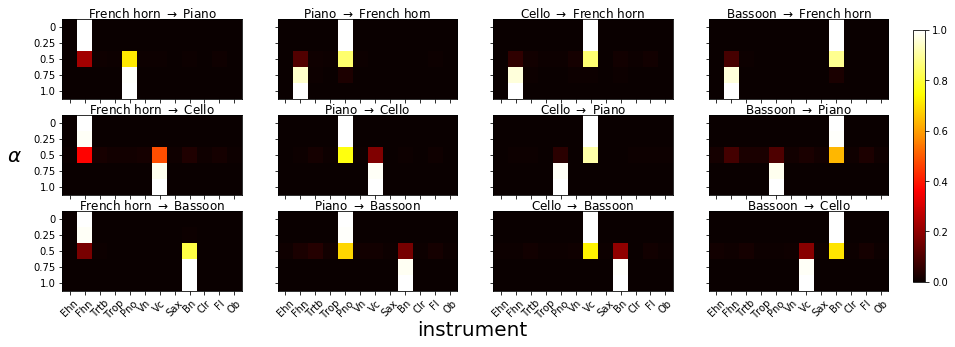

In [53]:
# pn2fn = torch.stack([d_1['pn'][0], d_1['pn'][1], d_2['pn'][1], d_3['fn'][1], d_4['fn'][1]]).data.numpy()
# fn2vc = torch.stack([d_1['fn'][0], d_1['fn'][2], d_2['fn'][2], d_3['fn'][2], d_4['fn'][2]]).data.numpy()
# fn2bs = torch.stack([d_1['fn'][0], d_1['fn'][3], d_2['fn'][3], d_3['fn'][3], d_4['fn'][3]]).data.numpy()
fig, ax = plt.subplots(3, 4, figsize=(17, 15/3), sharex=True, sharey=True)#, gridspec_kw = {'wspace':0.05})

im = ax[0][0].imshow(fn2pn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[0][0].set_title(r'French horn $\rightarrow$ Piano', pad=1.3)
im = ax[1][0].imshow(fn2vc, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[1][0].set_title(r'French horn $\rightarrow$ Cello', pad=1.5)
im = ax[2][0].imshow(fn2bn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[2][0].set_title(r'French horn $\rightarrow$ Bassoon',pad=1.3)
ax[2][0].set_xticklabels(['Ehn', 'Fhn', 'Trtb', 'Trop', 'Pno', 'Vn', 'Vc', 'Sax', 'Bn', 'Clr', 'Fl', 'Ob'], 
                         rotation=45)

im = ax[0][1].imshow(pn2fn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[0][1].set_title(r'Piano $\rightarrow$ French horn',pad=1.3)
im = ax[1][1].imshow(pn2vc, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[1][1].set_title(r'Piano $\rightarrow$ Cello',pad=1.5)
im = ax[2][1].imshow(pn2bn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[2][1].set_title(r'Piano $\rightarrow$ Bassoon',pad=1.3)
ax[2][1].set_xticklabels(['Ehn', 'Fhn', 'Trtb', 'Trop', 'Pno', 'Vn', 'Vc', 'Sax', 'Bn', 'Clr', 'Fl', 'Ob'], 
                         rotation=45)

im = ax[0][2].imshow(vc2fn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[0][2].set_title(r'Cello $\rightarrow$ French horn',pad=1.3)
im = ax[1][2].imshow(vc2pn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[1][2].set_title(r'Cello $\rightarrow$ Piano',pad=1.5)
im = ax[2][2].imshow(vc2bn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[2][2].set_title(r'Cello $\rightarrow$ Bassoon',pad=1.3)
ax[2][2].set_xticklabels(['Ehn', 'Fhn', 'Trtb', 'Trop', 'Pno', 'Vn', 'Vc', 'Sax', 'Bn', 'Clr', 'Fl', 'Ob'], 
                         rotation=45)

im = ax[0][3].imshow(bn2fn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[0][3].set_title(r'Bassoon $\rightarrow$ French horn',pad=1.3)
im = ax[1][3].imshow(bn2pn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[1][3].set_title(r'Bassoon $\rightarrow$ Piano',pad=1.5)
im = ax[2][3].imshow(bn2vc, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[2][3].set_title(r'Bassoon $\rightarrow$ Cello',pad=1.3)
ax[2][3].set_xticks( ticks=np.arange(12))
ax[2][3].set_xticklabels(['Ehn', 'Fhn', 'Trtb', 'Trop', 'Pno', 'Vn', 'Vc', 'Sax', 'Bn', 'Clr', 'Fl', 'Ob'], 
                         rotation=45)
ax[0][0].set_yticks( ticks=np.arange(5))
ax[0][0].set_yticklabels(['0', '0.25', '0.5', '0.75', '1.0'])

fig.text(0.46, 0.00, 'instrument', ha='center', fontsize=20)
fig.text(0.08, 0.5, r'$\alpha$', va='center', fontsize=20) #rotation='vertical')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
# plt.savefig('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/transfer.eps', format='eps', dpi=50)

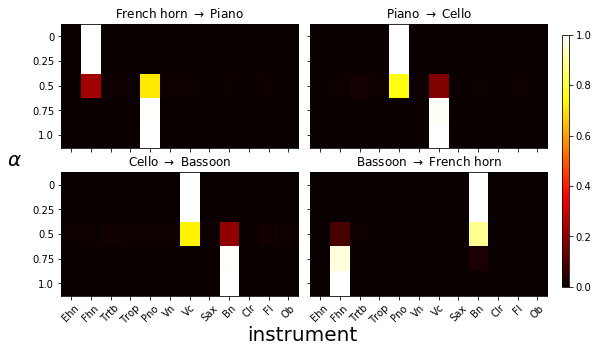

In [66]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5), gridspec_kw = {'wspace':0.05})

im = ax[0][0].imshow(fn2pn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[0][0].set_title(r'French horn $\rightarrow$ Piano')

im = ax[0][1].imshow(pn2vc, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[0][1].set_title(r'Piano $\rightarrow$ Cello')

im = ax[1][0].imshow(vc2bn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[1][0].set_title(r'Cello $\rightarrow$ Bassoon')
ax[1][0].set_xticklabels(['Ehn', 'Fhn', 'Trtb', 'Trop', 'Pno', 'Vn', 'Vc', 'Sax', 'Bn', 'Clr', 'Fl', 'Ob'], 
                         rotation=45)

im = ax[1][1].imshow(bn2fn, aspect='auto', vmin=0, vmax=1, cmap=plt.get_cmap('hot'), interpolation='nearest')
ax[1][1].set_title(r'Bassoon $\rightarrow$ French horn')
ax[1][1].set_yticks( ticks=np.arange(5))
ax[1][1].set_yticklabels(['0', '0.25', '0.5', '0.75', '1.0'])
ax[1][1].set_xticks(ticks=np.arange(12))
ax[1][1].set_xticklabels(['Ehn', 'Fhn', 'Trtb', 'Trop', 'Pno', 'Vn', 'Vc', 'Sax', 'Bn', 'Clr', 'Fl', 'Ob'], 
                         rotation=45)

fig.text(0.46, 0.00, 'instrument', ha='center', fontsize=20)
fig.text(0.05, 0.5, r'$\alpha$', va='center', fontsize=20) #rotation='vertical')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/transfer_simplify.eps', format='eps', dpi=50)

In [131]:
pt = torch.load(os.path.join(path_to_model, 'test_transfer_pitch.pt'))

pt = pt * 100
pt = pt.data.numpy()


In [132]:

# yp_fn, yp_pn, yp_vc, yp_bs = pt[:4], pt[4:8], pt[8:12], pt[12:]

In [133]:

fn_after = yt_fn[:,fn].data.numpy()
df_fn = pd.DataFrame({'source_fn': [fn_before.item(), fn_after[0]], 
                      'piano': [fn2pn.item(), fn_after[1]], 
                      'cello': [fn2vc.item(), fn_after[2]], 
                      'basson': [fn2bs.item(), fn_after[3]]})
df_fn.loc[-1] = pt[0]
df_fn

,source_fn,piano,cello,basson
0,99.948593,99.889908,99.850769,99.960526
1,99.948593,0.012492,0.016689,0.004557
-1,100.000000,100.000000,100.000000,100.000000


In [134]:

df_pn.loc[-1] = pt[1]
df_pn

,source_pno,French-horn,cello,basson
0,99.905357,99.853668,99.959854,99.927574
1,99.905357,0.012244,0.005086,0.002618
-1,95.833328,75.000000,79.166672,79.166672


In [135]:
fn_before, fn2pn, fn2vc, fn2bs = yt_vc[0][vc], yt_vc[1][fn], yt_vc[2][pno], yt_vc[3][bs]
fn_after = yt_vc[:, vc].data.numpy()
df_vc = pd.DataFrame({'source_vc': [fn_before.item(), fn_after[0]], 
                      'French-horn': [fn2pn.item(), fn_after[1]], 
                      'piano': [fn2vc.item(), fn_after[2]], 
                      'basson': [fn2bs.item(), fn_after[3]]})
df_vc.loc[-1] = pt[2]
df_vc

,source_vc,French-horn,piano,basson
0,99.966499,99.908676,99.892303,99.949791
1,99.966499,0.004985,0.013087,0.002547
-1,100.000000,100.000000,100.000000,100.000000


In [136]:
fn_before, fn2pn, fn2vc, fn2bs = yt_bs[0][bs], yt_bs[1][fn], yt_bs[2][pno], yt_bs[3][vc]
fn_after = yt_bs[:, bs].data.numpy()
df_bs = pd.DataFrame({'source_bs': [fn_before.item(), fn_after[0]], 
                      'French-horn': [fn2pn.item(), fn_after[1]], 
                      'piano': [fn2vc.item(), fn_after[2]], 
                      'cello': [fn2bs.item(), fn_after[3]]})
df_bs.loc[-1] = pt[3]
df_bs

,source_bs,French-horn,piano,cello
0,99.948349,99.884964,99.853149,99.925095
1,99.948349,0.026889,0.008930,0.006698
-1,100.000000,100.000000,100.000000,100.000000
